Again, we have to read some data first,...

In [1]:
# first, the imports
import os
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

np.random.seed(19760812)
plt.style.use('bmh')
%matplotlib inline

# We read some wind data

In [2]:
# read the file 'mast.txt'
ipath = os.path.join('Datos', 'mast.txt')

def dateparse(date, time):
    YY = 2000 + int(date[:2])
    MM = int(date[2:4])
    DD = int(date[4:])
    hh = int(time[:2])
    mm = int(time[2:])
    
    return dt.datetime(YY, MM, DD, hh, mm, 0)
    

cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, sep = "\s*", names = cols, 
                   parse_dates = {'Timestamp': [0, 1]}, index_col = 0,
                   date_parser = dateparse)

/home/tornadin/miniconda3/envs/sciconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/home/tornadin/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tornadin/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


# We read a file of environmental data

In [3]:
# we read the file 'model.txt'
ipath = os.path.join('Datos', 'model.txt')

model = pd.read_csv(ipath, sep = "\s*", skiprows = 3,
                    parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')

/home/tornadin/miniconda3/envs/sciconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/home/tornadin/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tornadin/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [4]:
for c in ['x1','x2','x3','x4','x5']: # Remove unnecesary columns
    _ = wind.pop(c)
wind.head(3)

,wspd,wspd_max,wdir,wspd_std
Timestamp,,,,
2013-09-04 00:00:00,2.21,2.58,113.5,0.11
2013-09-04 00:10:00,1.69,2.31,99.9,0.35
2013-09-04 00:20:00,1.28,1.50,96.0,0.08


In [5]:
model.head(3)

,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
Timestamp,,,,,,,
1984-01-01 00:00:00,20.8,243,7.3,1.25,1002.8,0.04,86.3
1984-01-01 01:00:00,20.8,243,7.3,1.25,1002.2,0.04,86.9
1984-01-01 02:00:00,20.6,243,7.4,1.24,1001.8,0.04,87.0


In [6]:
wind['Timestamp'] = wind.index
print(wind['Timestamp'].diff().min())
del wind['Timestamp']

0 days 00:10:00


In [7]:
model['Timestamp'] = model.index
print(model['Timestamp'].diff().min())
del model['Timestamp']

0 days 01:00:00


# `plot` is our *silver bullet*

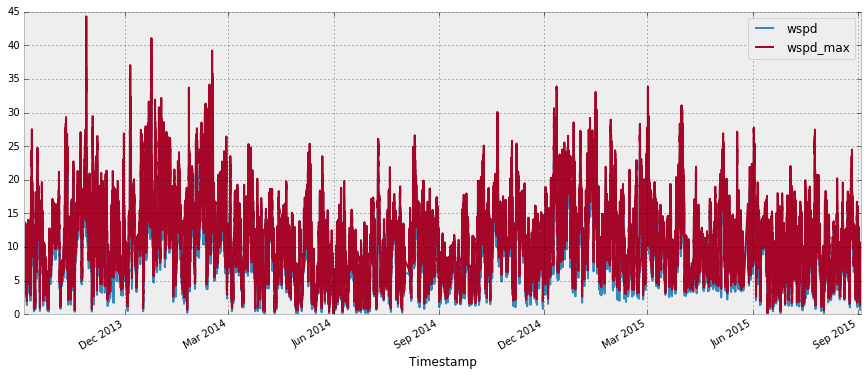

In [8]:
wind.loc[:, 'wspd':'wspd_max'].plot(figsize = (15, 6))

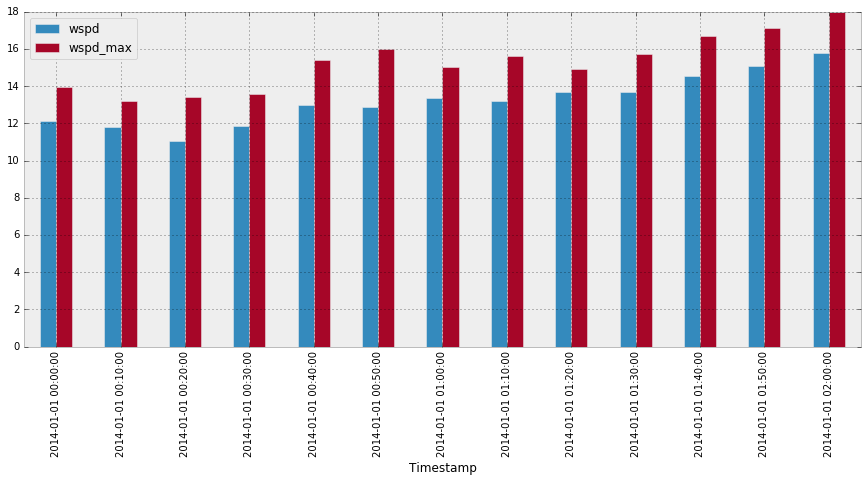

In [9]:
wind.loc['2014/01/01 00:00': '2014/01/01 02:00', 'wspd':'wspd_max'].plot(kind = 'bar', figsize = (15, 6))

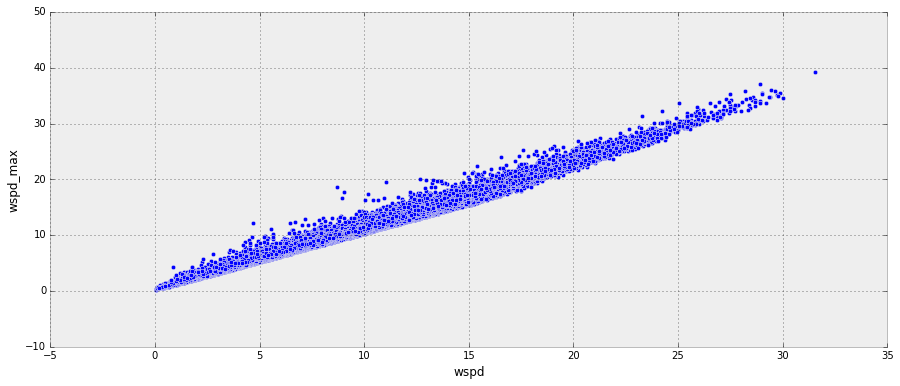

In [10]:
wind.loc['2014/01/01': '2014/12/31', 'wspd':'wspd_max'].plot(
    kind = 'scatter', 
    x = 'wspd',
    y = 'wspd_max',
    figsize = (15, 6)
)

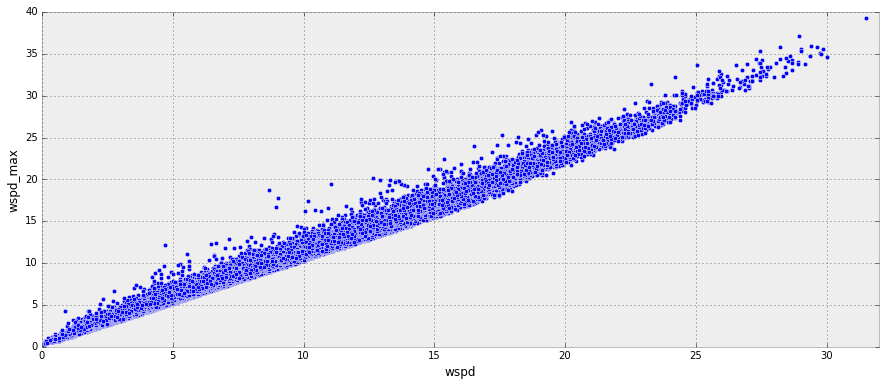

In [11]:
wind.loc['2014/01/01': '2014/12/31', 'wspd':'wspd_max'].plot(
    kind = 'scatter', 
    x = 'wspd',
    y = 'wspd_max',
    figsize = (15, 6),
    xlim = (0, 32),
    ylim = (0, 40)
)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff981b19dd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff981ac7908>], dtype=object)

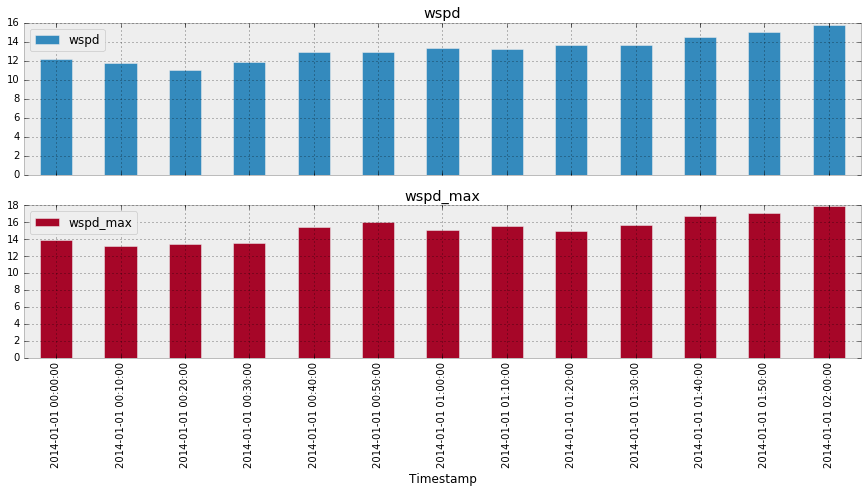

In [12]:
wind.loc['2014/01/01 00:00': '2014/01/01 02:00', 'wspd':'wspd_max'].plot(
    kind = 'bar', 
    figsize = (15, 6),
    subplots = True
)

Another way to do it, `plot` provides us an API to use each plotting type:

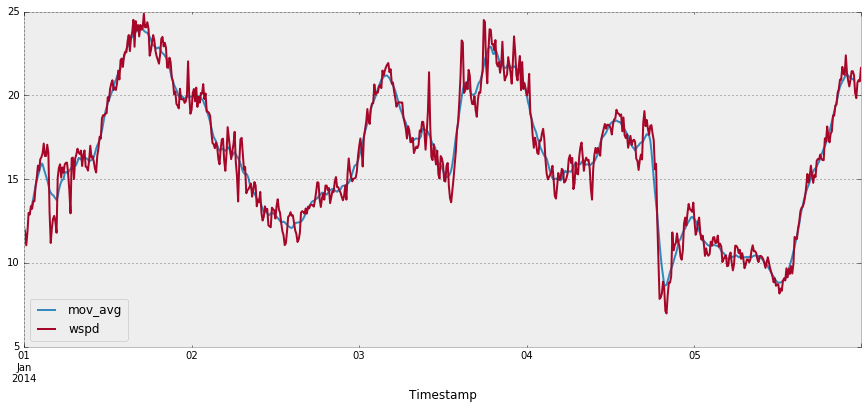

In [16]:
s1 = wind.loc['2014/01/01': '2014/01/05', 'wspd']
s2 = s1.rolling(13, center = True).mean()
tmp = pd.DataFrame({'wspd': s1, 'mov_avg': s2})
tmp.plot.line(figsize = (15, 6))

But what happens if I want to highlight the line `'mov_avg'`. We can do it in the following manner:

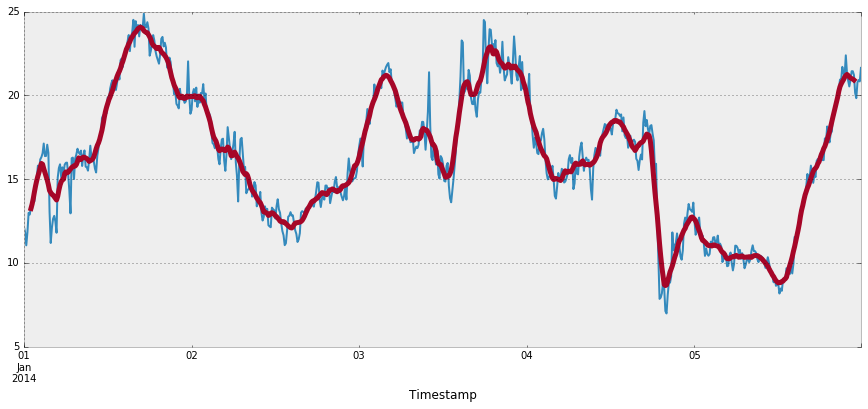

In [17]:
ax = tmp['wspd'].plot.line(figsize = (15, 6))
tmp['mov_avg'].plot.line(figsize = (15, 6), lw = 5, ax = ax)

Other kind of plots:

In [18]:
possible = dir(pd.DataFrame.plot)
for p in possible:
    if '_' not in p: print(p)

area
bar
barh
box
density
hexbin
hist
kde
line
pie
scatter


Let's see, for instance, the wind speed histogram:

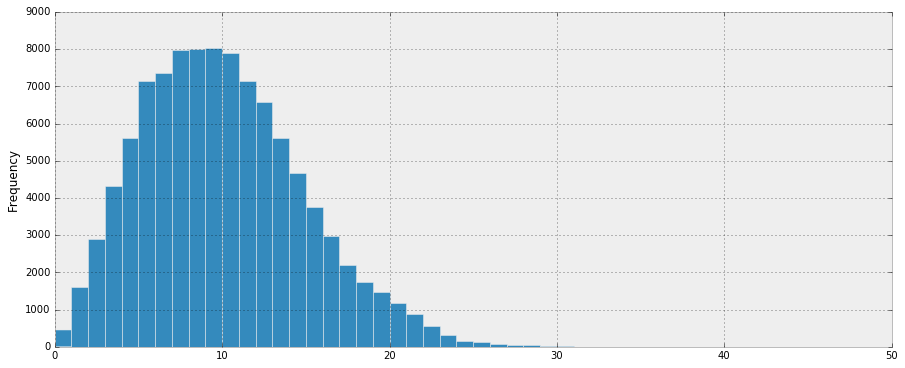

In [19]:
wind['wspd'].plot.hist(bins = np.arange(0, 50), figsize = (15, 6))

Also, there is a `plotting` submodule with tools that mix analysis and visualisation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff97f0f0668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff97e3b28d0>]], dtype=object)

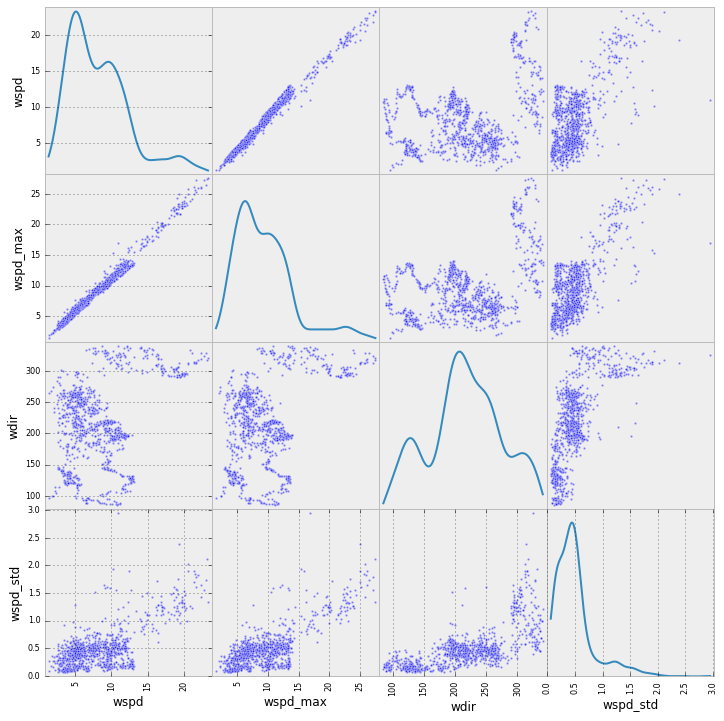

In [20]:
pd.tools.plotting.scatter_matrix(
    wind.iloc[0:1000, :], 
    diagonal = 'kde',
    figsize = (12, 12)
)

In [ ]:
# Make your own plots using different plots to taht used before
